In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# Decision_date and case_recieved_date are read as dates
df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

Let's take a look at the structure of our dataset by checking the number of observations, columns and displaying 10 first and last rows.

In [5]:
# Displaying number of rows and columns
print('Number of Visa Applications:', len(df))
print('Number of Columns:', len(df.columns))

Number of Visa Applications: 374362
Number of Columns: 154


In [6]:
# Displaying 5 first rows
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [7]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

 case_number & case_no these columns contain similar values and their "NaN" values add up to the total number of observations so let's create new column containing only non missing values from both "case_number" and "case_no" columns and then we will remove them.

In [8]:
casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)
    
for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)
    
df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

In [9]:
#Printing number of unique values for 'case_status' column
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value])," occurrences of status '{}'".format(value))

181933  occurrences of status 'Certified'
25649  occurrences of status 'Denied'
148586  occurrences of status 'Certified-Expired'
18194  occurrences of status 'Withdrawn'


In [11]:
df.isna().sum()

add_these_pw_job_title_9089               332168
agent_city                                162908
agent_firm_name                           167365
agent_state                               166123
application_type                          239093
case_received_date                        135271
case_status                                    0
class_of_admission                         22845
country_of_citizenship                     20633
country_of_citzenship                     353788
decision_date                                  0
employer_address_1                            42
employer_address_2                        149193
employer_city                                 14
employer_country                          135343
employer_decl_info_title                  135308
employer_name                                 12
employer_num_employees                    135349
employer_phone                            135305
employer_phone_ext                        350901
employer_postal_code

[Text(0,0.5,'Number of Visa applicatons'), Text(0.5,0,'Visa application year')]

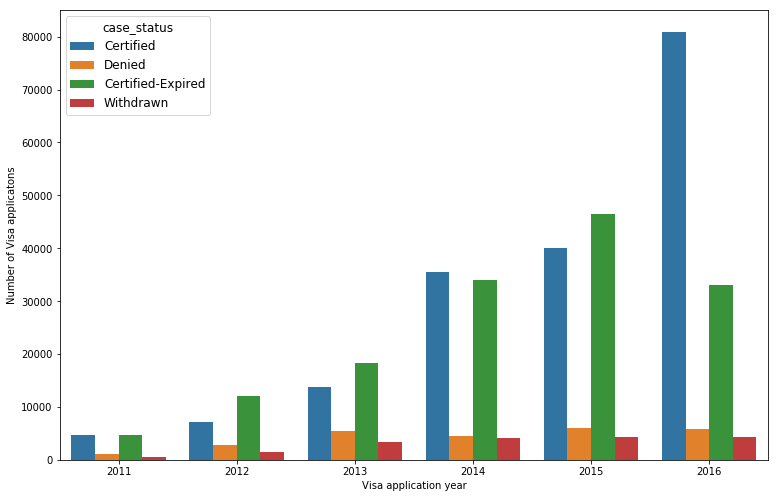

In [10]:
#Converting the date to contain just the year of application submission
df['year'] = df['decision_date'].dt.year

#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=df)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

As we can observe, the number of submitted Visa applications increases every year. It's interesting that while the number of possitively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities.

In [12]:
# Displaying 15 most popular cities
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(15)

NEW YORK           17989
COLLEGE STATION    12121
SANTA CLARA        11195
SAN JOSE            9503
REDMOND             8821
MOUNTAIN VIEW       8363
HOUSTON             7066
SAN FRANCISCO       6676
SUNNYVALE           6344
PLANO               5957
CHICAGO             5934
SEATTLE             5207
LOS ANGELES         4337
EDISON              4280
DALLAS              3916
Name: employer_city, dtype: int64

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer city')]

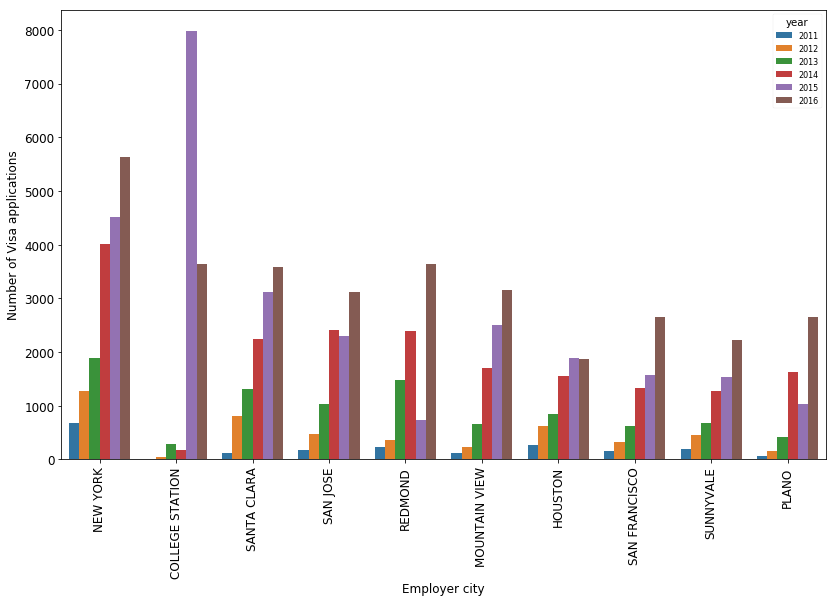

In [13]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

In the last few years, the most popular destination cities were: New York, College Station, Santa Clara, San Jose, Redmond, Mountain View, Houston, SunnyVale, San Francisco and Plano. In most of the cities there was a positive trend in Visa applications. A bizarre situation occured in College Station in 2015 where the number of submitted Visa applications was more or less twice large as in other cities.

Now, let's take a look what were the most hiring employers and economic sectors through these years. For "us_economic_sector" variable we have only 120 868 non-missing values, but this should give us an insight.

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer name')]

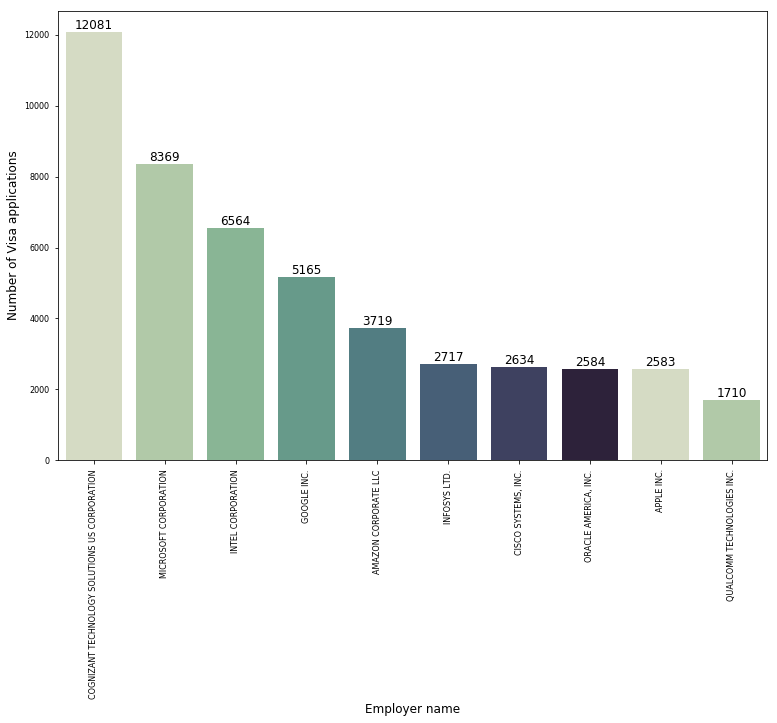

In [14]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "employer_name" column and displaying counts above bars 
for i, v in df.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States. Let's check what is the distribution of industries across all Visa applications.

In [15]:
df['job_info_job_title'].value_counts()[:20]

Software Engineer                   14827
Computer Systems Analyst - V         4755
Senior Software Engineer             3925
Computer Systems Analyst - II        3434
Software Developer                   3013
Assistant Professor                  2674
Programmer Analyst                   2640
Computer Systems Analyst - IV        2501
Systems Analyst                      2093
Poultry Processing Worker            1987
Software Development Engineer II     1656
Poultry Processor                    1179
Component Design Engineer            1129
software engineer                    1009
Business Analyst                     1006
SOFTWARE ENGINEER                     903
Senior Programmer Analyst             877
Sr. Software Engineer                 874
Commercial Cleaner                    862
Senior Software Developer             839
Name: job_info_job_title, dtype: int64

Since our column contains job titles with different letter casing we need to standarize them so that value_counts() method will be able to count them more appropriately. Also, there are lots of same positions like "Computer Systems Analyst" which differ only by the number standing after hyphen so we will split these titles by finding the '-', 'ii' and '/' signs and leaving only the left side of the splitting result. Afterwards, we are going to remove leading and ending spaces, replace "sr." with "senior" values and get rid of 'nan's.

In [16]:
#Converting values to lower case
df['job_info_job_title'] = df['job_info_job_title'].str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

software engineer                19211
computer systems analyst         12138
senior software engineer          5978
software developer                4721
programmer analyst                3918
assistant professor               2952
software development engineer     2814
systems analyst                   2670
poultry processing worker         1989
senior programmer analyst         1930
Name: job_info_job_title, dtype: int64

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Job Title')]

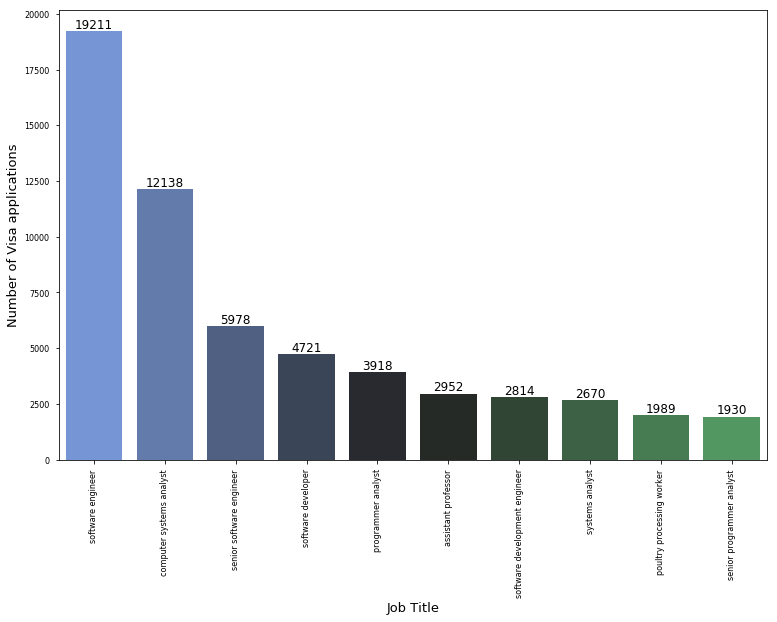

In [17]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=df, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

Interestingely, all of the most popular positions except "assistant professor" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA and being one of them increases our chances to obtain a permanent Visa.

[Text(0,0.5,'Number of Visa applications'),
 Text(0.5,0,'Country of citizenship')]

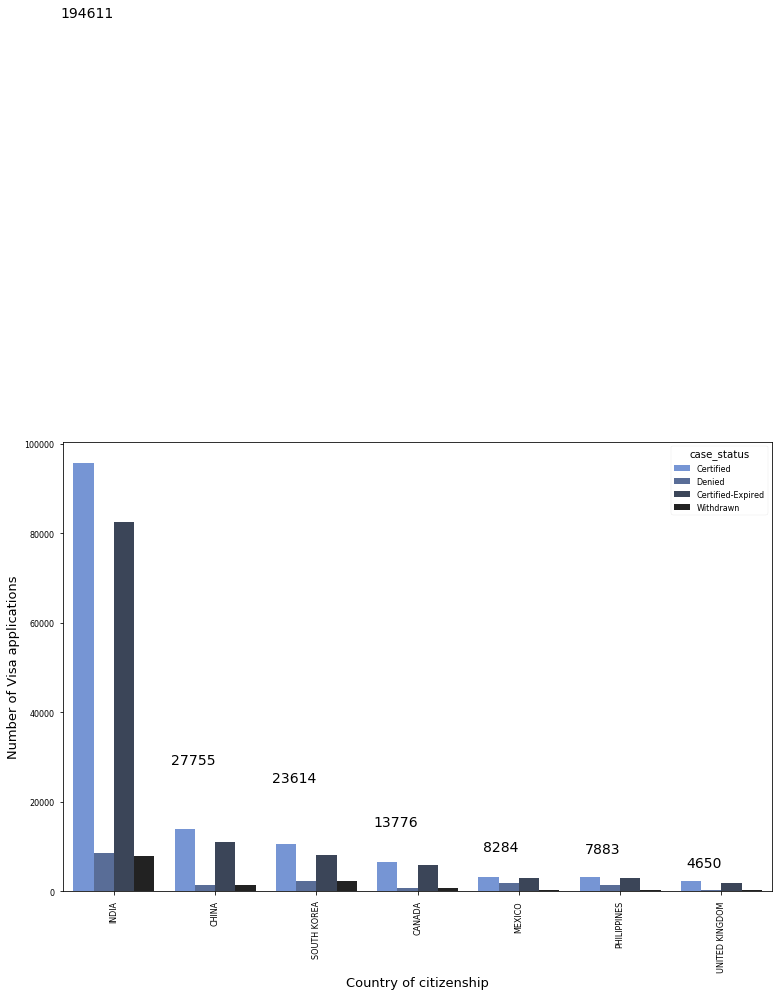

In [18]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df, 
              palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), 
              order=df.country_of_citizenship.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

#Iterating over elements in "country_of_citizenship" column and displaying counts above bars 
for i, v in df.country_of_citizenship.value_counts().head(7).reset_index().iterrows():
    ax.text(i,v.country_of_citizenship,v.unique()[1], horizontalalignment='right',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

As we can see, the majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations, we can assume that most of them are computer specialists.

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Visa type')]

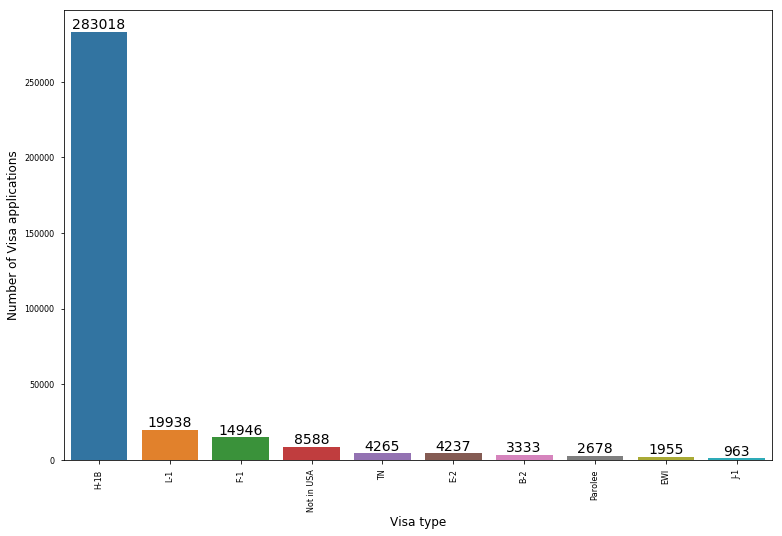

In [19]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.countplot(x='class_of_admission',data=df, 
              order=df.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "class_of_admission" column and displaying counts above bars 
for i, v in df.class_of_admission.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. If a foreign worker in H-1B status quits or is dismissed from the sponsoring employer, the worker must either apply for and be granted a change of status, find another employer (subject to application for adjustment of status and/or change of visa), or leave the United States.

Finally, let's try checking on the number and kind of application types. Unfortunately, our data consists only of 126 848 non-missing values for this attribute, but this should give us a general overview.

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Application type')]

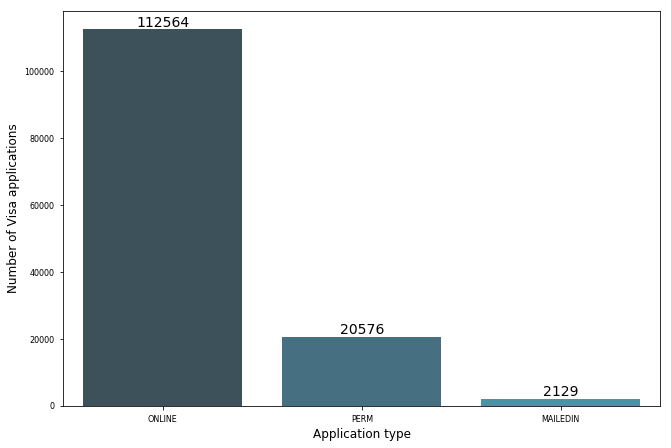

In [20]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 7.27)
sns.countplot(x='application_type', data=df, palette = sns.color_palette("GnBu_d"), order=df.application_type.value_counts().iloc[:10].index)

#Iterating over elements in "application_type" column and displaying counts above bars 
for i, v in df.application_type.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.application_type,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Application type', ylabel='Number of Visa applications')

Online submission was the most popular form of application type. Here, we can also find "PERM" value which is probably incorrect. My assumtion is that some petitioners thought about this form field as a distinction between "temporary" and "permanent" Visa type. The last plotting activity will be displaying the applicants education level and remuneration.

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Education level')]

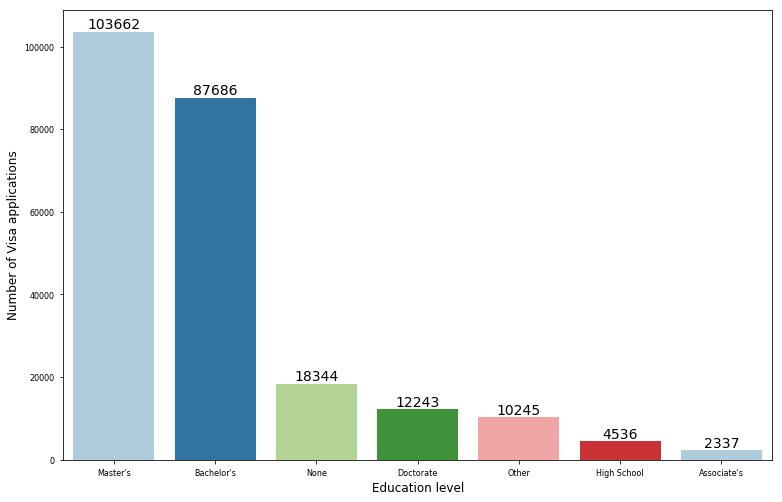

In [21]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='foreign_worker_info_education',data=df, 
               palette = sns.color_palette("Paired"), 
               order=df.foreign_worker_info_education.value_counts().iloc[:10].index)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df.foreign_worker_info_education.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.foreign_worker_info_education,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Education level', ylabel='Number of Visa applications')

As we can see, over 50% of applicants obtained a university degree. Before plotting the remuneration, we will remove commas from the values so that they are left only with decimal places denoted. Also, since some of the wages are hourly, weekly, bi-weekly and monthly values, we have to calculate the yearly equivalents for them. 

In [22]:
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
5,37024.0,yr
6,47083.33,yr
7,36733.0,yr
8,44824.0,yr
9,12.86,hr


In [23]:
#Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 

for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
df['pw_amount_9089']= df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

#Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

#Displaying 10 first values
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.00,Year
1,37024.00,Year
2,47923.00,Year
3,21940.00,Year
4,94890.00,Year
5,37024.00,Year
6,47083.33,Year
7,36733.00,Year
8,44824.00,Year
9,25720.00,Year


In [24]:
#Since running "describe" method on "pw_amount_9089" column returned exponential values, I decided to 
#convert them to floats so that they are easier to understand
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      374362.00
mean       476666.47
std       7749169.18
min             7.50
25%         67308.80
50%         86154.00
75%        104666.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [25]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        22035
30-60k       50217
60-90k      139278
90-120k     117579
120-150k     31931
150-180k      7420
180-210k      4007
210-240k       638
240-270k        30
270k+         1226
Name: remuneration, dtype: int64

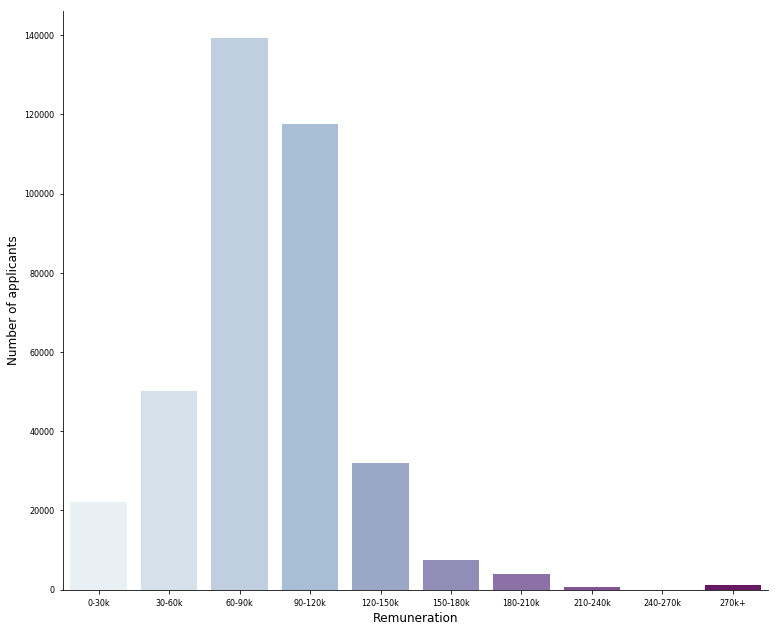

In [26]:
# Draw a count plot to show the distribution of remunerations
g = sns.factorplot(x='remuneration', data=df, kind="count",
                   palette="BuPu", size=9, aspect=1.2)

g.set(xlabel='Remuneration', ylabel='Number of applicants')

As we can see, over 65% of the applicants earn between 60 and 120 thousand dollars yearly. From this moment, we will start working on the feature selection and data cleansing.

In [27]:
#Displaying percentage of non-null values for each feature
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  11.27 % non-null values
1 Column: 'agent_city' contains  56.48 % non-null values
2 Column: 'agent_firm_name' contains  55.29 % non-null values
3 Column: 'agent_state' contains  55.63 % non-null values
4 Column: 'application_type' contains  36.13 % non-null values
5 Column: 'case_received_date' contains  63.87 % non-null values
6 Column: 'case_status' contains  100.0 % non-null values
7 Column: 'class_of_admission' contains  93.9 % non-null values
8 Column: 'country_of_citizenship' contains  94.49 % non-null values
9 Column: 'country_of_citzenship' contains  5.5 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  60.15 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  63.85 % non-null values
15 Column: 'employer_decl_info_title' contains

119 Column: 'recr_info_sunday_newspaper' contains  62.25 % non-null values
120 Column: 'recr_info_swa_job_order_end' contains  62.21 % non-null values
121 Column: 'recr_info_swa_job_order_start' contains  62.22 % non-null values
122 Column: 'refile' contains  31.54 % non-null values
123 Column: 'ri_1st_ad_newspaper_name' contains  63.24 % non-null values
124 Column: 'ri_2nd_ad_newspaper_name' contains  63.23 % non-null values
125 Column: 'ri_2nd_ad_newspaper_or_journal' contains  62.22 % non-null values
126 Column: 'ri_campus_placement_from' contains  8.01 % non-null values
127 Column: 'ri_campus_placement_to' contains  8.01 % non-null values
128 Column: 'ri_coll_tch_basic_process' contains  1.87 % non-null values
129 Column: 'ri_coll_teach_pro_jnl' contains  40.76 % non-null values
130 Column: 'ri_coll_teach_select_date' contains  1.53 % non-null values
131 Column: 'ri_employee_referral_prog_from' contains  18.36 % non-null values
132 Column: 'ri_employee_referral_prog_to' contains  1